In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix



In [159]:
df = pd.read_csv('../data/ML.csv')

In [160]:
df['isRent'] = 0
df['isRent'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

In [161]:
df.loc[1]

user_id                                  496663
id                                      4599813
title                                        59
price                                     25000
content                                     193
imgs                                         12
beds                                          3
livings                                     1.0
wc                                            2
area                                      130.0
street_width                               30.0
age                                        12.0
ketchen                                     1.0
ac                                          0.0
furnished                                   0.0
district                                     56
review                                     4.33
profileImg                                 True
iam_verified                               True
DayOfRent                                     5
onMarket                                

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             6531 non-null   int64  
 1   id                                  6531 non-null   int64  
 2   title                               6531 non-null   int64  
 3   price                               6531 non-null   int64  
 4   content                             6531 non-null   int64  
 5   imgs                                6531 non-null   int64  
 6   beds                                6531 non-null   int64  
 7   livings                             6531 non-null   float64
 8   wc                                  6531 non-null   int64  
 9   area                                6531 non-null   float64
 10  street_width                        6531 non-null   float64
 11  age                                 6531 no

In [163]:
train, test = train_test_split(df, train_size=0.7, random_state=123)


In [164]:
X_train = train[["beds", "age" , 'area']]
y_train = train["isRent"]

In [165]:
dt_mod = DecisionTreeRegressor(max_depth=3)

In [166]:
dt_fit = dt_mod.fit(X_train, y_train)

In [167]:
dt_fit.get_n_leaves()

8

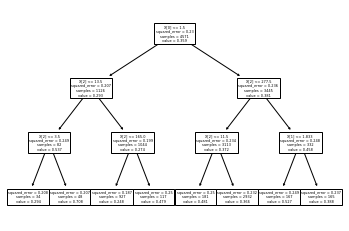

In [168]:
plot_tree(dt_fit)
plt.show()

In [169]:
dt_mod = DecisionTreeRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train, 
                          y_train, cv=kfold, scoring=loss)


np.round(np.abs(results))

array([1., 1., 1., 1., 1.])

In [170]:
X_train_encoded = pd.get_dummies(X_train)

# fit model with 5-fold CV
results = cross_val_score(dt_mod, X_train_encoded, y_train, cv=kfold, scoring=loss)

np.abs(np.mean(results))

0.5461419804968399

In [171]:
dt_mod = DecisionTreeRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {
  'ccp_alpha': [1e-1, 1e-5, 1e-10],
  'max_depth': [1, 8, 15],
  'min_samples_split': [2, 21, 40]
  }

In [172]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train_encoded, y_train)

# Optimal penalty parameter in grid search
results.best_estimator_.get_params()

{'ccp_alpha': 1e-05,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [173]:
# Best model's cross validated RMSE
round(abs(results.best_score_), 2)

0.48

In [174]:
from copy import deepcopy
data_scaled = deepcopy(df)
data_scaled.drop('isRent', axis=1, inplace = True)

ss = StandardScaler()

ss.fit(data_scaled)
data_scaled = ss.transform(data_scaled)

In [175]:
data_scaled

array([[ 0.19521431,  0.63768911, -0.36849176, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       [-1.00323738,  0.65832008, -0.17230527, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       [ 1.29466205,  0.41097773,  1.00481369, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       ...,
       [-1.24788656, -0.14221418, -0.56467826, ...,  0.5164103 ,
         0.5164103 , -0.76717366],
       [-1.45392371,  0.58352324,  0.12197447, ...,  0.5164103 ,
         0.5164103 , -0.42813602],
       [ 0.93263069, -2.47641952, -0.36849176, ...,  0.5164103 ,
         0.5164103 , -0.65416111]])

In [176]:
# df['isRent'] = 0
df['isRent'] = np.where(  df['DayOfRent'] == 0 ,  0 , 1)

In [177]:
data_scaled

array([[ 0.19521431,  0.63768911, -0.36849176, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       [-1.00323738,  0.65832008, -0.17230527, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       [ 1.29466205,  0.41097773,  1.00481369, ...,  0.5164103 ,
         0.5164103 , -0.31512348],
       ...,
       [-1.24788656, -0.14221418, -0.56467826, ...,  0.5164103 ,
         0.5164103 , -0.76717366],
       [-1.45392371,  0.58352324,  0.12197447, ...,  0.5164103 ,
         0.5164103 , -0.42813602],
       [ 0.93263069, -2.47641952, -0.36849176, ...,  0.5164103 ,
         0.5164103 , -0.65416111]])

In [178]:
X = df.drop('isRent', axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [179]:
X = df.drop('isRent', axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LogisticRegression(max_iter=500)

# training & prediction
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(y_test, lr_pred))
print()
print('Classification Report :\n', classification_report(y_test, lr_pred))

Confusion Matrix :
 [[1019    0]
 [ 612    2]]

Classification Report :
               precision    recall  f1-score   support

           0       0.62      1.00      0.77      1019
           1       1.00      0.00      0.01       614

    accuracy                           0.63      1633
   macro avg       0.81      0.50      0.39      1633
weighted avg       0.77      0.63      0.48      1633



3726     211899
3691     779331
1636     825676
531      879567
3666    1524584
         ...   
468     4600178
1571    4600194
6480    4600222
24      4600237
2441    4600241
Name: id, Length: 6531, dtype: int64

In [180]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

AttributeError: 'function' object has no attribute 'sum'

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['isRent'])
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[751  57]
 [121 378]]
              precision    recall  f1-score   support

       False       0.86      0.93      0.89       808
        True       0.87      0.76      0.81       499

    accuracy                           0.86      1307
   macro avg       0.87      0.84      0.85      1307
weighted avg       0.86      0.86      0.86      1307



In [ ]:
df['lat'] = 0
df['lng'] = 0

In [ ]:
for index , row in df.iterrows() :
    a = row['location'] 
    a = a.replace('\''  , '\"' )
    a= json.loads(a)
    df['lat'][index] =  a.get('lat')
    df['lng'][index] =  a.get('lng')

/tmp/ipykernel_715/3726828350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_715/3726828350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


------- 

In [ ]:
df[df['refresh']!=df['last_update']].value_counts().sum()

929

-------

In [ ]:
df = df[df['area'] <= 1000]

-----